In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Letter\Letter_NE_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.0,4.0,4.0,3.0,2.0,7.0,8.0,NaN,9.0,11.0,7.0,7.0,1.0,8.0,5.0,6.0,NaN
1,4.0,7.0,5.0,5.0,5.0,NaN,9.0,6.0,4.0,8.0,7.0,9.0,2.0,9.0,7.0,10.0,NaN
2,7.0,10.0,8.0,7.0,4.0,8.0,8.0,5.0,10.0,NaN,2.0,8.0,2.0,5.0,5.0,10.0,NaN
3,4.0,9.0,5.0,7.0,4.0,7.0,7.0,13.0,1.0,7.0,6.0,8.0,3.0,8.0,0.0,8.0,NaN
4,6.0,7.0,8.0,5.0,4.0,7.0,6.0,3.0,7.0,10.0,7.0,9.0,3.0,8.0,3.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.0,10.0,5.0,8.0,3.0,4.0,10.0,7.0,8.0,12.0,10.0,9.0,2.0,9.0,2.0,6.0,NaN
19996,4.0,7.0,6.0,5.0,3.0,7.0,NaN,NaN,10.0,12.0,6.0,8.0,1.0,9.0,6.0,8.0,NaN
19997,4.0,8.0,4.0,6.0,4.0,7.0,8.0,NaN,4.0,10.0,7.0,NaN,3.0,9.0,3.0,7.0,NaN
19998,4.0,11.0,4.0,8.0,3.0,NaN,2.0,4.0,6.0,1.0,0.0,7.0,NaN,8.0,0.0,8.0,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	250
float64		column 2	1000
float64		column 3	750
float64		column 4	1500
float64		column 5	1750
float64		column 6	1250
float64		column 7	1750
float64		column 8	1500
float64		column 9	250
float64		column 10	1250
float64		column 11	750
float64		column 12	1500
float64		column 13	1500
float64		column 14	250
float64		column 15	250
float64		column 16	500
float64		column 17	20000


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
count,19750.000000,19000.000000,19250.000000,18500.000000,18250.000000,18750.000000,18250.000000,18500.000000,19750.000000,18750.000000,19250.000000,18500.000000,18500.000000,19750.000000,19750.000000,19500.000000,0.0
mean,4.021722,7.042789,5.120779,5.383730,3.490849,6.901973,7.500493,4.623514,5.175848,8.277173,6.446442,7.931730,3.035351,8.338886,3.688759,7.800051,NaN
std,1.908400,3.265134,1.992768,2.229748,2.142301,1.980838,2.240102,2.641025,2.374356,2.448690,2.608200,2.016216,2.279071,1.540725,2.560462,1.605950,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,7.000000,3.000000,4.000000,7.000000,5.000000,7.000000,2.000000,8.000000,2.000000,7.000000,NaN
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.000000,NaN
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,8.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,8.000000,NaN
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,NaN


<AxesSubplot:>

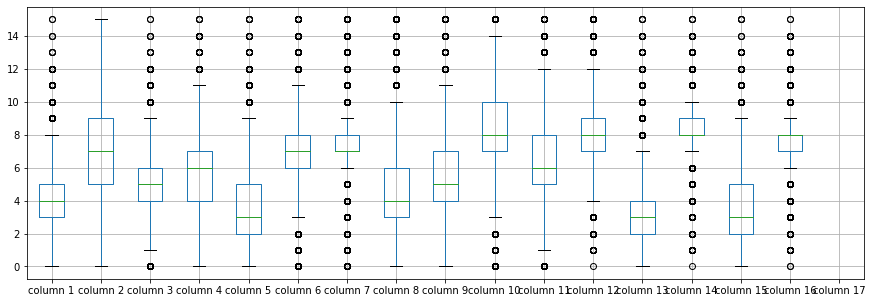

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     4.021722
column 2     7.042789
column 3     5.120779
column 4     5.383730
column 5     3.490849
column 6     6.901973
column 7     7.500493
column 8     4.623514
column 9     5.175848
column 10    8.277173
column 11    6.446442
column 12    7.931730
column 13    3.035351
column 14    8.338886
column 15    3.688759
column 16    7.800051
column 17         NaN
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
column 1,1.000000,0.752076,0.848219,0.666331,0.611112,-0.031808,0.045959,0.008608,0.053912,0.147386,0.037905,-0.043923,0.479835,0.097176,0.273181,-0.100309,NaN
column 2,0.752076,1.000000,0.663832,0.815010,0.542360,0.046000,-0.037271,-0.026321,0.093520,0.158527,-0.049220,-0.001868,0.267587,-0.003077,0.226155,-0.035724,NaN
column 3,0.848219,0.663832,1.000000,0.652249,0.757003,0.063447,0.025051,-0.101983,0.057638,0.114854,0.012700,-0.046770,0.548998,0.042093,0.256884,-0.115504,NaN
column 4,0.666331,0.815010,0.652249,1.000000,0.630765,0.041826,-0.013967,0.075815,0.055168,0.010560,-0.006088,0.027849,0.260486,0.027990,0.290900,-0.013758,NaN
column 5,0.611112,0.542360,0.757003,0.630765,1.000000,0.136289,-0.030994,-0.015431,-0.064214,-0.067262,-0.068017,-0.035956,0.610615,0.013768,0.484680,-0.060046,NaN
column 6,-0.031808,0.046000,0.063447,0.041826,0.136289,1.000000,-0.355036,-0.047751,-0.118694,0.072428,-0.337168,-0.026830,0.141776,-0.250740,0.123672,0.243881,NaN
column 7,0.045959,-0.037271,0.025051,-0.013967,-0.030994,-0.355036,1.000000,-0.114286,-0.051398,0.160244,0.588037,-0.256482,-0.043180,0.547092,-0.078753,-0.201492,NaN
column 8,0.008608,-0.026321,-0.101983,0.075815,-0.015431,-0.047751,-0.114286,1.000000,-0.185098,-0.312744,0.038570,0.084513,0.129101,-0.085178,0.007240,0.179658,NaN
column 9,0.053912,0.093520,0.057638,0.055168,-0.064214,-0.118694,-0.051398,-0.185098,1.000000,0.130150,-0.057790,0.107623,-0.370948,-0.051480,0.274397,-0.060012,NaN
column 10,0.147386,0.158527,0.114854,0.010560,-0.067262,0.072428,0.160244,-0.312744,0.130150,1.000000,0.054781,-0.100986,-0.173031,0.029507,-0.091593,-0.111039,NaN


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+4,17+4+4,17+4+4+4,17+4+4,17+4,17], vae_layer = False, seed = 40)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [17]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 75.60605566711426
Epoch: 1 , loss: 48.93343359375
Epoch: 2 , loss: 44.32380657653808
Epoch: 3 , loss: 42.71530871887207
Epoch: 4 , loss: 41.59982962493896
Epoch: 5 , loss: 41.04307375640869
Epoch: 6 , loss: 40.64008270111084
Epoch: 7 , loss: 40.24721714630127
Epoch: 8 , loss: 39.97983611450195
Epoch: 9 , loss: 39.93710939941406
Epoch: 10 , loss: 39.61776625061035
Epoch: 11 , loss: 39.44763477172852
Epoch: 12 , loss: 39.48591657714844
Epoch: 13 , loss: 39.3321968826294
Epoch: 14 , loss: 39.377844609069825
Epoch: 15 , loss: 39.115834092712404
Epoch: 16 , loss: 39.124798567199704
Epoch: 17 , loss: 39.04177960205078
Epoch: 18 , loss: 39.01865697021484
Epoch: 19 , loss: 38.74627777862549
Epoch: 20 , loss: 38.84927695159912
Epoch: 21 , loss: 38.86890870666504
Epoch: 22 , loss: 38.85097996673584
Epoch: 23 , loss: 38.743758432006835
Epoch: 24 , loss: 38.626023292541504
Epoch: 25 , loss: 38.57649112854004
Epoch

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(20000, 17)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     3.000000
column 2     7.000000
column 3     3.000000
column 4     5.000000
column 5     1.000000
column 6     1.000000
column 7     1.000000
column 8     5.000000
column 9     5.000000
column 10    7.535764
column 11    1.000000
column 12    6.000000
column 13    0.000000
column 14    8.000000
column 15    0.000000
column 16    8.000000
column 17   -0.002997
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Letter.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.128406,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN
1,0.0,0.0,0.0,0.0,0.0,1.842377,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,-2.79896,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN
19996,0.0,0.0,0.0,0.0,0.0,0.000000,-2.299229,1.518934,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN
19997,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,-3.138361,0.0,0.00000,0.000000,0.710709,0.000000,0.0,0.0,0.0,NaN
19998,0.0,0.0,0.0,0.0,0.0,6.369941,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,2.854467,0.0,0.0,0.0,NaN


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

397.8003766059197

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

3733.8164121981144

In [18]:
NRMS=numerator/denominator
NRMS


0.10653988645674543

In [19]:
new_df.iloc[66,:]

column 1      6.000000
column 2      9.000000
column 3     10.000000
column 4      7.000000
column 5     11.000000
column 6     10.000000
column 7      5.000000
column 8      3.000000
column 9      2.000000
column 10     9.000000
column 11     4.915611
column 12     8.000000
column 13    11.000000
column 14     6.000000
column 15     4.000000
column 16     7.000000
column 17    -0.006085
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.0,4.0,4.0,3.0,2.0,7.000000,8.000000,3.128406,9.0,11.00000,7.000000,7.000000,1.000000,8.0,5.0,6.0,-0.006762
1,4.0,7.0,5.0,5.0,5.0,6.842377,9.000000,6.000000,4.0,8.00000,7.000000,9.000000,2.000000,9.0,7.0,10.0,-0.005051
2,7.0,10.0,8.0,7.0,4.0,8.000000,8.000000,5.000000,10.0,8.20104,2.000000,8.000000,2.000000,5.0,5.0,10.0,-0.003020
3,4.0,9.0,5.0,7.0,4.0,7.000000,7.000000,13.000000,1.0,7.00000,6.000000,8.000000,3.000000,8.0,0.0,8.0,-0.002059
4,6.0,7.0,8.0,5.0,4.0,7.000000,6.000000,3.000000,7.0,10.00000,7.000000,9.000000,3.000000,8.0,3.0,7.0,-0.000404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.0,10.0,5.0,8.0,3.0,4.000000,10.000000,7.000000,8.0,12.00000,10.000000,9.000000,2.000000,9.0,2.0,6.0,0.002170
19996,4.0,7.0,6.0,5.0,3.0,7.000000,5.700771,3.518934,10.0,12.00000,6.000000,8.000000,1.000000,9.0,6.0,8.0,-0.002219
19997,4.0,8.0,4.0,6.0,4.0,7.000000,8.000000,3.861639,4.0,10.00000,7.000000,6.710709,3.000000,9.0,3.0,7.0,-0.000310
19998,4.0,11.0,4.0,8.0,3.0,6.369941,2.000000,4.000000,6.0,1.00000,0.000000,7.000000,2.854467,8.0,0.0,8.0,-0.001750


In [21]:
imputations[-1].to_excel("Letter_NE_5(imp).xlsx", index=False, header=False)